## pdf, pptx, docs
**これらを、"Python"を使って自動生成してみる**

ここでは基本的な内容のみに限定します。  
本格的な作り込みは、公式ドキュメントを参照しながら作成してみてください。  
「あ、こんな簡単にできるものなんだ」と思っていただき、自動化に向けた足掛かりができればと思います。  

**ここでは、"python-autodoc"という仮想環境を作ってから、専用の**  
**みなさまの環境では、Anacondaを利用しているかと思います。したがって、下記のように仮想環境を用意します)**  
**(※Pythonバージョンは仮に3.7とします)**  
```conda create -n python-autodoc python=3.7 anaconda```  
  
**今回、必要となるライブラリ群をインストールします**  
```pip install python-docx```  
```pip install python-pptx```  ←今回扱うもの  
```pip install openpyxl```  
```pip install reportlab```  
```pip install tabula-py```  ←今回扱うもの

**まずはPDFについてみていく**  
右のドキュメントを参考してみます...！
[平成30年 全衛連ストレスチェックサービス実施結果報告書](http://www.zeneiren.or.jp/cgi-bin/pdfdata/20190925114437.pdf)

いろいろ分析していく中で、特に事前調査していく中では様々な文献や資料を漁って調べるかと思います。  
その中でPDFファイルの中の、表やグラフを引用したり、実際のデータとして利用したいと考えたりするかもしれません。  
表自体が少なかったりデータ自体も少なければ、手打ちでもいいです。  
  
でも、表が多かったり、データ量が多かったり....そんな場合は、手打ちは嫌ですよね？(それが仕事だと言われればそうかもしれませんが笑)  
なるべくなら、手間を省きたいのが心情というもの。。。  

  
そこで登場するのが、"tabula"というPythonライブラリ。
tabulaの準備ができたところで、pandasとtabulaををimportしておきます。

In [223]:
import pandas as pd
import tabula

In [224]:
# lattice=Trueでテーブルの軸線でセルを判定
dfs = tabula.read_pdf("/Users/Toki/Documents/20190925114437.pdf", lattice=True, pages = '40')

for df in dfs:
    display(df)

,業種,高ストレ\rス者数,受検者数,高ストレス\r者の割合
0,農業、林業,647,"4,221",15.3%
1,漁業,88,732,12.0%
2,鉱業、採石業、砂利採取業,165,"1,041",15.9%
3,建設業,"4,144","32,692",12.7%
4,製造業,"96,803","545,062",17.8%
5,電気・ガス・熱供給・水道業,"1,603","14,618",11.0%
6,情報通信業,"3,112","20,072",15.5%
7,運輸業、郵便業,"16,068","117,188",13.7%
8,卸業、小売業,"19,293","135,446",14.2%
9,金融業、保険業,"4,922","42,740",11.5%


In [5]:
df = df.rename(columns={'高ストレ\rス者数': '高ストレス者数', '高ストレス\r者の割合': '高ストレス者の割合'})

In [6]:
import pandas as pd
import tabula

# csv/Excelとして保存(今回はdfs[0]のみ)
df = dfs[0].rename(columns={'高ストレ\rス者数': '高ストレス者数', '高ストレス\r者の割合': '高ストレス者の割合'})
df.to_csv("PDFの表.csv", index=None) # csv
df.to_excel("PDFの表.xlsx", index=None) # Excel

### pdfから抽出してきたデータを使って、グラフを作成

In [43]:
import re

データの中は、数値ではなく文字列も含んでいる＆インデックスに業種をおきたい

In [35]:
obj_high_stress = []
for i in df['高ストレス者数']:
    if type(i) != float:
        obj_high_stress.append(int(i.replace(',','')))
    else:
        obj_high_stress.append(i)

In [38]:
obj_tester = []
for i in df['受検者数']:
    if type(i) != float:
        obj_tester.append(int(i.replace(',','')))
    else:
        obj_tester.append(i)

In [40]:
obj_rate_high_stress = []
for i in df['高ストレス者の割合']:
    if type(i) != float:
        obj_rate_high_stress.append(float(i.replace('%','')))
    else:
        obj_rate_high_stress.append(i)

In [44]:
df['高ストレス者数'] = obj_high_stress
df['受検者数'] = obj_tester
df['高ストレス者の割合'] = obj_rate_high_stress

In [45]:
df

,業種,高ストレス者数,受検者数,高ストレス者の割合
0,農業、林業,647.0,4221.0,15.3
1,漁業,88.0,732.0,12.0
2,鉱業、採石業、砂利採取業,165.0,1041.0,15.9
3,建設業,4144.0,32692.0,12.7
4,製造業,96803.0,545062.0,17.8
5,電気・ガス・熱供給・水道業,1603.0,14618.0,11.0
6,情報通信業,3112.0,20072.0,15.5
7,運輸業、郵便業,16068.0,117188.0,13.7
8,卸業、小売業,19293.0,135446.0,14.2
9,金融業、保険業,4922.0,42740.0,11.5


あとは、インデックスを業種にしたい

In [46]:
df_i = df.set_index('業種')

In [50]:
df_i.index

Index(['農業、林業', '漁業', '鉱業、採石業、砂利採取業', '建設業', '製造業', '電気・ガス・熱供給・水道業', '情報通信業',
       '運輸業、郵便業', '卸業、小売業', '金融業、保険業', '不動産業、物品賃貸業', '学術研究、専門・技術サービス業',
       '宿泊業、飲食業', '生活関連サービス業、娯楽業', '教育、学習支援業', '医療、福祉', '複合サービス事業',
       'サービス業(他に分類されないもの)', '公務(他に分類されるものを除く)', 'その他', '全業種', '製造業中分類',
       '食料品製造業', '飲料・たばこ・飼料製造業', '繊維工業', '木材・木製品製造業(家具を除く)', '家具・装備品製造業',
       'パルプ・紙・紙加工品製造業', '印刷・同関連業', '化学工業', '石油製品・石炭製品製造業', 'プラスチック製品製造業',
       'ゴム製品製造業', 'なめし皮・銅製品・毛皮製造業', '窯業・土石製品製造業', '鉄鋼業', '非鉄金属製造業', '金属製品製造業',
       'はん用機械器具製造業', '生産用機械器具製造業', '業務用機械器具製造業', '電子部品・デバイス・電子回路製造業',
       '電気機械器具製造業', '情報通信機械器具製造業', '輸送用機械器具製造業'],
      dtype='object', name='業種')

In [47]:
df_i

,高ストレス者数,受検者数,高ストレス者の割合
業種,,,
農業、林業,647.0,4221.0,15.3
漁業,88.0,732.0,12.0
鉱業、採石業、砂利採取業,165.0,1041.0,15.9
建設業,4144.0,32692.0,12.7
製造業,96803.0,545062.0,17.8
電気・ガス・熱供給・水道業,1603.0,14618.0,11.0
情報通信業,3112.0,20072.0,15.5
運輸業、郵便業,16068.0,117188.0,13.7
卸業、小売業,19293.0,135446.0,14.2


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
df_before = df_i.iloc[0:19]
df_after = df_i.iloc[22:]

In [76]:
df_after

,高ストレス者数,受検者数,高ストレス者の割合
業種,,,
食料品製造業,9868.0,62400.0,15.8
飲料・たばこ・飼料製造業,1039.0,9678.0,10.7
繊維工業,2671.0,16839.0,15.9
木材・木製品製造業(家具を除く),518.0,2428.0,21.3
家具・装備品製造業,685.0,3735.0,18.3
パルプ・紙・紙加工品製造業,1512.0,7310.0,20.7
印刷・同関連業,3122.0,16650.0,18.8
化学工業,2495.0,16085.0,15.5
石油製品・石炭製品製造業,94.0,949.0,9.9


/Users/Toki/tmp/Twitter_API/venv/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 21463 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Toki/tmp/Twitter_API/venv/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 26908 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Toki/tmp/Twitter_API/venv/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Toki/tmp/Twitter_API/venv/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 21106 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Toki/tmp/Twitter_API/venv/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 21512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/Toki/tmp/Twitter_API/venv/li

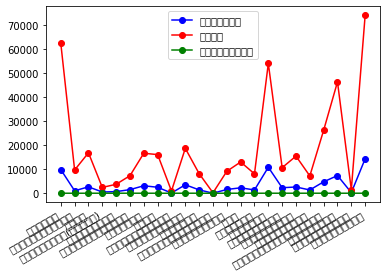

In [83]:
f, ax = plt.subplots(1, 1)

ax.plot_date(df_after.index, df_after["高ストレス者数"], color="blue", label="高ストレス者数", linestyle="-")
ax.plot_date(df_after.index, df_after["受検者数"], color="red", label="受検者数", linestyle="-")
ax.plot_date(df_after.index, df_after["高ストレス者の割合"], color="green", label="高ストレス者の割合", linestyle="-")

ax.legend()

plt.gcf().autofmt_xdate()
plt.show()

文字化けしてしまっているので、  
日本語と英語の辞書を作って、英語表記に置き換えてみる

In [58]:
dict_gyosyu_to_english = {
    '農業、林業': 'Agriculture, forestry',
    '漁業': 'Fishery',
    '鉱業、採石業、砂利採取業': 'Mining, quarrying, gravel extraction',
    '建設業': 'Construction',
    '製造業': 'Manufacturing',
    '電気・ガス・熱供給・水道業': 'Electricity, gas, heat supply and water supply',
    '情報通信業': 'Information and communication',
    '運輸業、郵便業': 'Transportation, postal',
    '卸業、小売業': 'Wholesale and retail trade',
    '金融業、保険業': 'Financial business, insurance business',
    '不動産業、物品賃貸業': 'Real estate business, Property leasing business',
    '学術研究、専門・技術サービス業': 'Academic research, professional/technical service business',
    '宿泊業、飲食業': 'Accommodation business, restaurant business',
    '生活関連サービス業、娯楽業	': 'Life related service business, Amusement business',
    '教育、学習支援業': 'Education and learning support business',
    '医療、福祉': 'Medical care and welfare',
    '複合サービス事業': 'Complex service business',
    'サービス業(他に分類されないもの)': 'Service business (not classified elsewhere)',
    '公務(他に分類されるものを除く)': 'Public affairs (except those classified elsewhere)',
    'その他': 'Others',
    '全業種': 'All industries',
    '製造業中分類': 'Manufacturing sub-category',
    '食料品製造業': 'Food products',
    '飲料・たばこ・飼料製造業': 'Beverages, tobacco and feed manufacturing',
    '繊維工業': 'Textile industry',
    '木材・木製品製造業(家具を除く)': 'Wood and wood products manufacturing (excluding furniture)' ,
    '家具・装備品製造業': 'Furniture/Equipment Manufacturing',
    'パルプ・紙・紙加工品製造業': 'Pulp/paper/paper products manufacturing industry',
    '印刷・同関連業': 'Printing/related industries',
    '化学工業': 'Chemical industry',
    '石油製品・石炭製品製造業': 'Petroleum products/coal products manufacturing industry',
    'プラスチック製品製造業': 'Plastic products manufacturing industry',
    'ゴム製品製造業': 'Rubber product manufacturing industry',
    'なめし皮・銅製品・毛皮製造業': 'Leather leather/copper product/fur manufacturing industry',
    '窯業・土石製品製造業': 'Ceramics/debris product manufacturing industry',
    '鉄鋼業': 'Steel industry',
    '非鉄金属製造業': 'Non-ferrous metal manufacturing industry',
    '金属製品製造業': 'Metal product manufacturing industry',
    'はん用機械器具製造業': 'General-purpose machinery/equipment manufacturing',
    '生産用機械器具製造業': 'Production machinery/equipment manufacturing',
    '業務用機械器具製造業': 'Professional machinery/equipment manufacturing',
    '電子部品・デバイス・電子回路製造業': 'Electronic component/device/electronic circuit manufacturing',
    '電気機械器具製造業': 'Electrical machinery and equipment manufacturing industry',
    '情報通信機械器具製造業': 'Information and communication machinery and equipment manufacturing industry',
    '輸送用機械器具製造業': 'Transportation machinery and equipment manufacturing industry'
}

In [65]:
gyosyu_to_english = []
for i, j in dict_gyosyu_to_english.items():
    gyosyu_to_english.append(j)

In [66]:
gyosyu_to_english

['Agriculture, forestry',
 'Fishery',
 'Mining, quarrying, gravel extraction',
 'Construction',
 'Manufacturing',
 'Electricity, gas, heat supply and water supply',
 'Information and communication',
 'Transportation, postal',
 'Wholesale and retail trade',
 'Financial business, insurance business',
 'Real estate business, Property leasing business',
 'Academic research, professional/technical service business',
 'Accommodation business, restaurant business',
 'Life related service business, Amusement business',
 'Education and learning support business',
 'Medical care and welfare',
 'Complex service business',
 'Service business (not classified elsewhere)',
 'Public affairs (except those classified elsewhere)',
 'Others',
 'All industries',
 'Manufacturing sub-category',
 'Food products',
 'Beverages, tobacco and feed manufacturing',
 'Textile industry',
 'Wood and wood products manufacturing (excluding furniture)',
 'Furniture/Equipment Manufacturing',
 'Pulp/paper/paper products man

In [67]:
df_eng = df
df_eng['業種'] = gyosyu_to_english
df_eng_i = df.set_index('業種')

In [68]:
df_eng_i

,高ストレス者数,受検者数,高ストレス者の割合
業種,,,
"Agriculture, forestry",647.0,4221.0,15.3
Fishery,88.0,732.0,12.0
"Mining, quarrying, gravel extraction",165.0,1041.0,15.9
Construction,4144.0,32692.0,12.7
Manufacturing,96803.0,545062.0,17.8
"Electricity, gas, heat supply and water supply",1603.0,14618.0,11.0
Information and communication,3112.0,20072.0,15.5
"Transportation, postal",16068.0,117188.0,13.7
Wholesale and retail trade,19293.0,135446.0,14.2


"Others", "All industries", "Manufacturing sub-category"の前後で、二つに分けて可視化してみる

In [84]:
df_before = df_eng_i.iloc[0:19]
df_after = df_eng_i.iloc[22:]

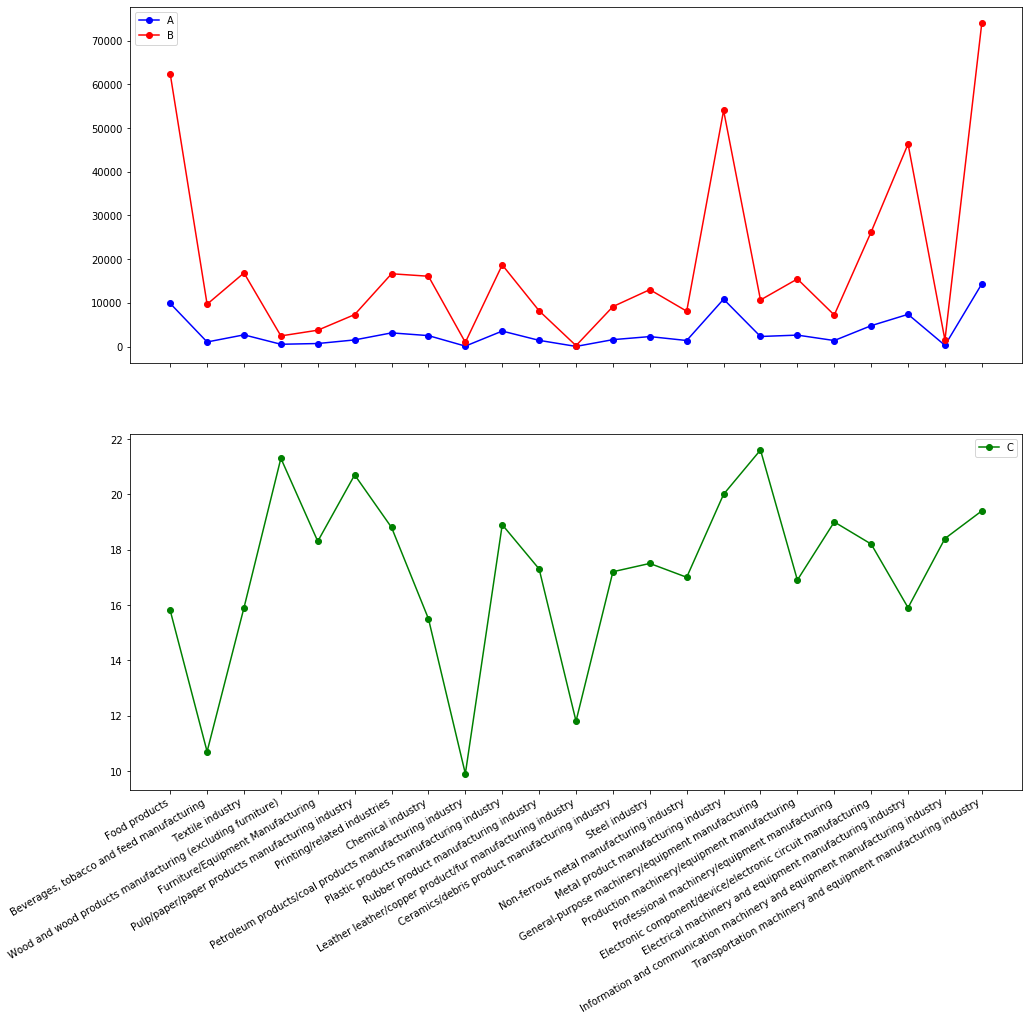

In [212]:
f = plt.figure(figsize=(16.0, 16.0))
ax1 = f.add_subplot(211)
ax2 = f.add_subplot(212)

ax1.plot_date(df_after.index, df_after["高ストレス者数"], color="blue", label="A", linestyle="-")
ax1.plot_date(df_after.index, df_after["受検者数"], color="red", label="B", linestyle="-")
ax2.plot_date(df_after.index, df_after["高ストレス者の割合"], color="green", label="C", linestyle="-")

ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()
f.savefig("1_調査報告書その１.png")
plt.show()

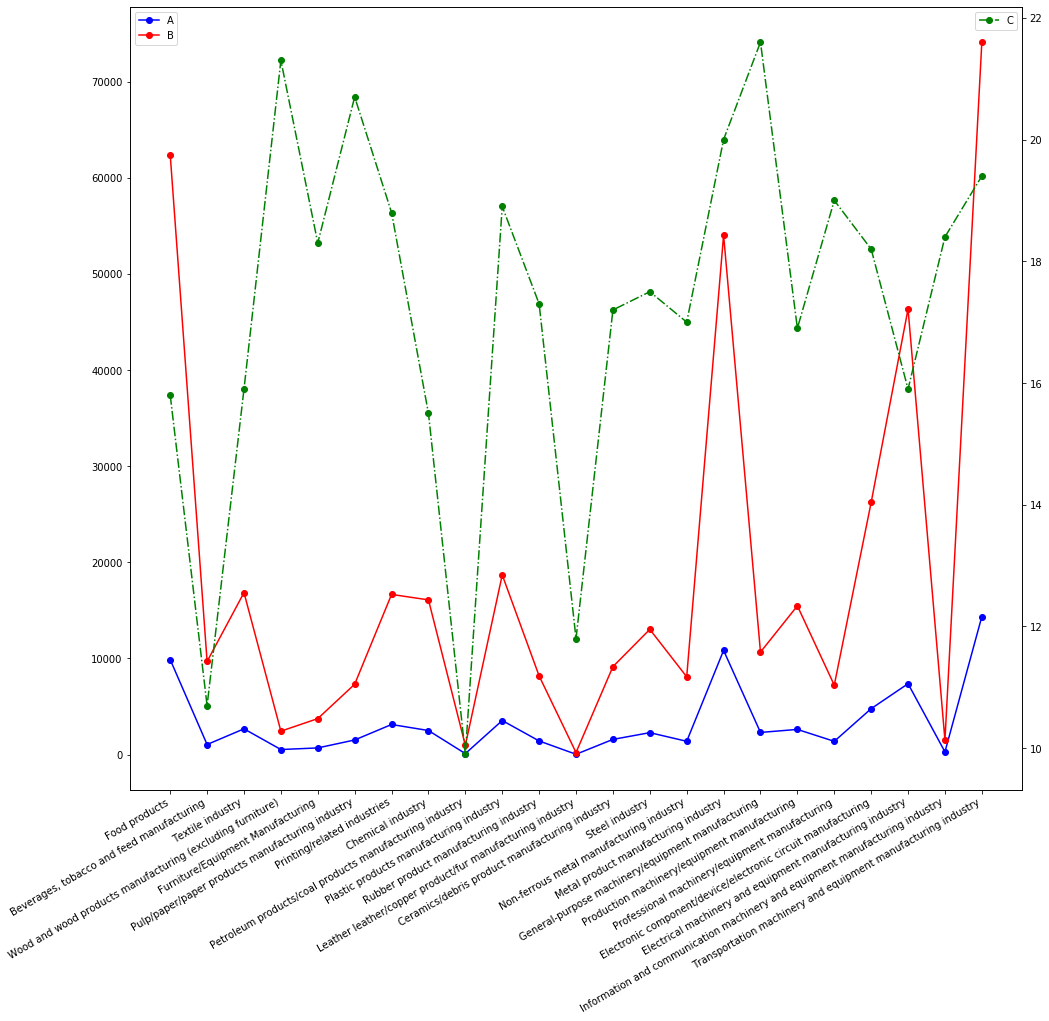

In [213]:
f = plt.figure(figsize=(16.0, 16.0))
ax1 = f.add_subplot(111)
ax2 = ax1.twinx()

ax1.plot_date(df_after.index, df_after["高ストレス者数"], color="blue", label="A", linestyle="-")
ax1.plot_date(df_after.index, df_after["受検者数"], color="red", label="B", linestyle="-")
ax2.plot_date(df_after.index, df_after["高ストレス者の割合"], color="green", label="C", linestyle="-.")

ax1.legend()
ax2.legend()

plt.gcf().autofmt_xdate()
f.savefig("2_調査報告書その２.png.png")
plt.show()

```plot_date```の引数```line_style``` には、以下のタイプがある  
'-' or 'solid'	solid line  
'--' or 'dashed'	dashed line  
'-.' or 'dashdot'	dash-dotted line  
':' or 'dotted'	dotted line  
'None' or ' ' or ''	draw nothing  

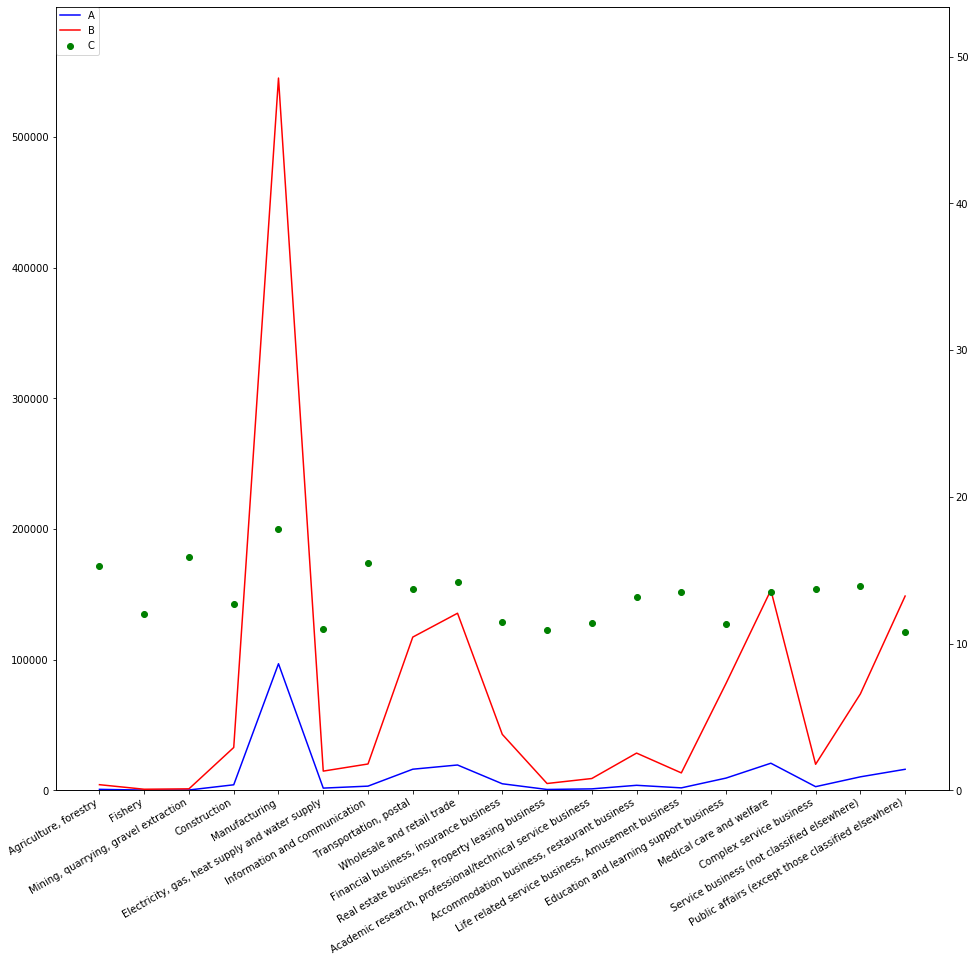

In [214]:
fig = plt.figure(figsize=(16.0, 16.0))
ax1 = fig.add_subplot()
 
# ax1とax2を関連させる
ax2 = ax1.twinx()
 
# それぞれのaxesオブジェクトのlines属性にLine2Dオブジェクトを追加
ax1.plot(df_before.index, df_before["高ストレス者数"], color="blue", label="A")
ax1.plot(df_before.index, df_before["受検者数"], color="red", label="B")
ax2.scatter(df_before.index, df_before["高ストレス者の割合"], color="green", label="C")
 
# 凡例
# グラフの本体設定時に、ラベルを手動で設定する必要があるのは、barplotのみ。plotは自動で設定される＞
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()
# 凡例をまとめて出力する
ax1.legend(handler1 + handler2, label1 + label2, loc=2, borderaxespad=0.)
 
pageview_max = 1.1 * max(df_before["受検者数"])
register_max = 3 * max(df_before["高ストレス者の割合"])
 
ax1.set_ylim([0, pageview_max])
ax2.set_ylim([0, register_max])

plt.gcf().autofmt_xdate()
f.savefig("3_調査報告書その３.png")
plt.show()

### パワポ形式の簡易な報告書を、Pythonで作ってみる

先ほどインストールしたものを利用していく

In [146]:
from pptx import Presentation

In [147]:
prs = Presentation()
title_slide_layout = prs.slide_layouts[0]
slide = prs.slides.add_slide(title_slide_layout)
title = slide.shapes.title
subtitle = slide.placeholders[1]

title.text = "調報告書"
subtitle.text = "エクテックカジュアル勉強会"

prs.save('test.pptx')

まずは、"Presentation()" で「箱」を用意します。この時に、テンプレとなるpptxがあれば随時利用しても良いかも

In [201]:
prs = Presentation("template.pptx")

スライドの全体として、例えば３枚のスライドに対してスライドレイアウトを適用する。
このスライドレイアウトは、最初に定義されるスライドマスタ。

In [202]:
slide = prs.slides.add_slide(prs.slide_layouts[3])

「プレースホルダ」とは、スライド上で文字やイラストやグラフなどを入力するための専用の領域のことで、  
通常は枠で囲まれ、枠中にメッセージが表示されています。  

プレースホルダーを使用すると、コンテンツを簡単に追加できます。  
スライドに新しいテキストボックスを最初から追加したり、決まった定型文やスタイルがあればあらかじめ設定できるもの。  
  
プレースホルダーは、適切なフォントサイズ、段落の配置、箇条書きのスタイルなどで、位置設定したりできる。  
パワポでいう、マスタースライド的なもの。

In [203]:
title_holder = slide.shapes.placeholders[0]

title_holderで定義された箱に、テキストを挿入できる

In [204]:
title_frame = title_holder.text_frame

入れたいワードをいれる

In [216]:
title = "調報告書"

In [217]:
title_frame.paragraphs[0].text = title

In [207]:
from pptx.util import Pt, Inches

パラグラフのフォントサイズを変更できる

In [218]:
title_frame.paragraphs[0].font.size = Pt(32)

位置を決めておく

In [219]:
left, top, width = Inches(2.5), Inches(1), Inches(6)

イメージファイルを挿入できる

In [210]:
slide.shapes.add_picture("./pictures/1_調査報告書その１.png", left, top, width=width)

セーブする

In [211]:
prs.save("sample.pptx")

### パワポ形式の簡易な報告書を、Pythonで作ってみる

In [222]:
from pathlib import Path
import pptx
from pptx.util import Pt, Inches

def create_slide(ppt, title, img_path):
    slide = ppt.slides.add_slide(ppt.slide_layouts[5])

    title_holder = slide.shapes.placeholders[0]
    title_frame = title_holder.text_frame
    title_frame.paragraphs[0].text = title
    title_frame.paragraphs[0].font.size = Pt(36)

    left, top, width = Inches(2.5), Inches(1), Inches(6)
    slide.shapes.add_picture(img_path, left, top, width=width)

prs = Presentation("template.pptx")
# P1: title page
title_slide_layout = prs.slide_layouts[0]  # page layout
slide = prs.slides.add_slide(title_slide_layout)
title = slide.shapes.title
subtitle = slide.placeholders[1]

title.text = "なんちゃって調査報告書"
subtitle.text = "@Sato"

img_dir = Path("./pictures")

for img in sorted(img_dir.glob("*.png")):
    file_name = img.stem
    prs_title = file_name.split("_")[1]
    create_slide(prs, prs_title, str(img))

prs.save("results.pptx")

In [ ]:
prs = Presentation("template.pptx")
# P1: title page
title_slide_layout = prs.slide_layouts[0]  # page layout
slide = prs.slides.add_slide(title_slide_layout)
title = slide.shapes.title
subtitle = slide.placeholders[1]

title.text = "なんちゃって調査報告書"
subtitle.text = "@Sato"

### 【余談】PythonでPCR

**日本語が使えないPCR**  
```pip install PyPDF2```  
**日本語も使えることができる、PCR**  
```pip install pdfminer.six```  
**同じく日本語も使えるが、Javaのライセンスに気を付けないといけないPCR**  
```pip install tika```  
**帳票系で使える感じです**  
```pip install pyocr```  

### TIKA使ってみる
#### 公表されている情報とはいえ、個人情報を含む情報が出てくるので、ここでは出力しません

PDFの中身のテキストをプログラムで読み取るのは大抵一筋縄ではいきません。日本語や帳票であればもっと難易度が上がります。  
この方法ならどんなPDFでも大丈夫という決定版はありません。目的や原稿のPDFの状態により、適した方法を選択する必要  
[毎月勤労統計調査 平成 30 年９月分結果速報等 を公表します](https://www.mhlw.go.jp/toukei/itiran/roudou/monthly/30/3009p/dl/houdou3009p.pdf)

In [143]:
#from tika import parser

#file_data = parser.from_file("765367.pdf")
#text = file_data["content"]
#print(text)

### pyocr使ってみる

**事前にOCRエンジンが必要なので、ここではGoogleが開発のしている"Tesseract"を使ってみる**  
  
macOS↓↓↓  
tesseract-ocrのインストールと実行  
```brew install tesseract```  
```brew install tesseract-lang```  
これを実行すると、
/usr/local/Cellar/tesseract-lang/ に"x.x.x"みたいな、例えば"4.1.1"のファイルが作成されている  
が、このままでは英数字しか扱えない。ので、日本語を扱えるように  
[tesseract-ocr/tessdata](https://github.com/tesseract-ocr/tessdata/tree/3.04.00)  
をダウンロードして、日本語データファイル"jpn.traineddata"を"/usr/local/Cellar/tesseract/3.02.02/share/tessdata/"に格納する  
※zipファイルで413MB, 解凍すると1.26GBあるので容量に注意...！
  
WindowsOS↓↓↓  



**元画像のねた↓↓↓**
**[出入国在留管理庁ホームページ](http://www.immi-moj.go.jp/tetuduki/zairyukanri/whatzairyu.html)**

In [131]:
import pyocr
import pyocr.builders

from PIL import Image

tools = pyocr.get_available_tools()
if len(tools) == 0:
    print("No OCR tool found")
    sys.exit(1)
tool = tools[0]
print("Will use tool '%s'" % (tool.get_name()))

langs = tool.get_available_languages()
print("Available languages: %s" % ", ".join(langs))

txt = tool.image_to_string(
    Image.open('sample_image.jpg'),
    lang='jpn',
    builder=pyocr.builders.TextBuilder()
)
print(txt)

Will use tool 'Tesseract (sh)'
Available languages: afr, amh, ara, asm, aze, aze_cyrl, bel, ben, bod, bos, bre, bul, cat, ceb, ces, chi_sim, chi_sim_vert, chi_tra, chi_tra_vert, chr, cos, cym, dan, deu, div, dzo, ell, eng, enm, epo, est, eus, fao, fas, fil, fin, fra, frk, frm, fry, gla, gle, glg, grc, guj, hat, heb, hin, hrv, hun, hye, iku, ind, isl, ita, ita_old, jav, jpn, jpn_vert, kan, kat, kat_old, kaz, khm, kir, kmr, kor, kor_vert, lao, lat, lav, lit, ltz, mal, mar, mkd, mlt, mon, mri, msa, mya, nep, nld, nor, oci, ori, osd, pan, pol, por, pus, que, ron, rus, san, script/Arabic, script/Armenian, script/Bengali, script/Canadian_Aboriginal, script/Cherokee, script/Cyrillic, script/Devanagari, script/Ethiopic, script/Fraktur, script/Georgian, script/Greek, script/Gujarati, script/Gurmukhi, script/HanS, script/HanS_vert, script/HanT, script/HanT_vert, script/Hangul, script/Hangul_vert, script/Hebrew, script/Japanese, script/Japanese_vert, script/Kannada, script/Khmer, script/Lao, scri

**あんまりきちんと取れていない。。。**  
**画像を、白黒で黒に強調したものを用意してみた**

In [132]:
tools = pyocr.get_available_tools()
if len(tools) == 0:
    print("No OCR tool found")
    sys.exit(1)
tool = tools[0]
print("Will use tool '%s'" % (tool.get_name()))

langs = tool.get_available_languages()
print("Available languages: %s" % ", ".join(langs))

txt = tool.image_to_string(
    Image.open('sample_image_filter.jpg'),
    lang='jpn',
    builder=pyocr.builders.TextBuilder()
)
print(txt)

Will use tool 'Tesseract (sh)'
Available languages: afr, amh, ara, asm, aze, aze_cyrl, bel, ben, bod, bos, bre, bul, cat, ceb, ces, chi_sim, chi_sim_vert, chi_tra, chi_tra_vert, chr, cos, cym, dan, deu, div, dzo, ell, eng, enm, epo, est, eus, fao, fas, fil, fin, fra, frk, frm, fry, gla, gle, glg, grc, guj, hat, heb, hin, hrv, hun, hye, iku, ind, isl, ita, ita_old, jav, jpn, jpn_vert, kan, kat, kat_old, kaz, khm, kir, kmr, kor, kor_vert, lao, lat, lav, lit, ltz, mal, mar, mkd, mlt, mon, mri, msa, mya, nep, nld, nor, oci, ori, osd, pan, pol, por, pus, que, ron, rus, san, script/Arabic, script/Armenian, script/Bengali, script/Canadian_Aboriginal, script/Cherokee, script/Cyrillic, script/Devanagari, script/Ethiopic, script/Fraktur, script/Georgian, script/Greek, script/Gujarati, script/Gurmukhi, script/HanS, script/HanS_vert, script/HanT, script/HanT_vert, script/Hangul, script/Hangul_vert, script/Hebrew, script/Japanese, script/Japanese_vert, script/Kannada, script/Khmer, script/Lao, scri

**だいぶよくなった？**  
**あとは、機械学習なり深層学習で精度を上げていくのも面白味があると思う**